In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
# data processing, CSV file I/O (e.g. pd.read_csv)

#Visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

import plotly.express as px
import plotly.graph_objs as go 
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
from plotly import tools
import seaborn as sns

#for visualization missing data

In [5]:
data = pd.read_csv("application_record.csv")
data


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [7]:
data.describe(include="all")

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
count,4.385570e+05,438557,438557,438557,438557.000000,4.385570e+05,438557,438557,438557,438557,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,304354,438557.000000
unique,NaN,2,2,2,NaN,NaN,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN
freq,NaN,294440,275459,304074,NaN,NaN,226104,301821,299828,393831,NaN,NaN,NaN,NaN,NaN,NaN,78240,NaN
mean,6.022176e+06,NaN,NaN,NaN,0.427390,1.875243e+05,NaN,NaN,NaN,NaN,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,NaN,2.194465
std,5.716370e+05,NaN,NaN,NaN,0.724882,1.100869e+05,NaN,NaN,NaN,NaN,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,NaN,0.897207
min,5.008804e+06,NaN,NaN,NaN,0.000000,2.610000e+04,NaN,NaN,NaN,NaN,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000
25%,5.609375e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
50%,6.047745e+06,NaN,NaN,NaN,0.000000,1.607805e+05,NaN,NaN,NaN,NaN,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
75%,6.456971e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,NaN,3.000000


In [9]:
print("Number of datapoints for application records: {}".format(len(data)))
print("Number of unique clients in dataset: {}".format(len(data.ID.unique())))

Number of datapoints for application records: 438557
Number of unique clients in dataset: 438510


In [11]:
records = pd.read_csv("credit_record.csv")
records

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [13]:
records.describe(include="all")

,ID,MONTHS_BALANCE,STATUS
count,1.048575e+06,1.048575e+06,1048575
unique,NaN,NaN,8
top,NaN,NaN,C
freq,NaN,NaN,442031
mean,5.068286e+06,-1.913700e+01,NaN
std,4.615058e+04,1.402350e+01,NaN
min,5.001711e+06,-6.000000e+01,NaN
25%,5.023644e+06,-2.900000e+01,NaN
50%,5.062104e+06,-1.700000e+01,NaN
75%,5.113856e+06,-7.000000e+00,NaN


In [15]:
print("Number of datapoints for credit records: {}".format(len(records)))
print("Number of unique clients in dataset: {}".format(len(records.ID.unique())))

Number of datapoints for credit records: 1048575
Number of unique clients in dataset: 45985


In [17]:
len(set(records['ID']).intersection(set(data['ID'])))

36457

In [19]:
print(f'Duplicates in applications data: {data.iloc[:,1:].duplicated().sum()}, ({np.round(100*data.iloc[:,1:].duplicated().sum()/len(data),1)}%)')

print(f'Duplicates in records data: {records.duplicated().sum()},  ({np.round(100*records.duplicated().sum()/len(records),1)}%)')

Duplicates in applications data: 348472, (79.5%)
Duplicates in records data: 0,  (0.0%)


In [21]:
data.duplicated().sum()

0

In [23]:
# Drop Duplicates
data=data.drop_duplicates(subset=data.columns[1:], keep="first")

In [25]:
data.shape

(90085, 18)

In [27]:
[(col, data[col].nunique()) for col in data.columns]

[('ID', 90085),
 ('CODE_GENDER', 2),
 ('FLAG_OWN_CAR', 2),
 ('FLAG_OWN_REALTY', 2),
 ('CNT_CHILDREN', 12),
 ('AMT_INCOME_TOTAL', 866),
 ('NAME_INCOME_TYPE', 5),
 ('NAME_EDUCATION_TYPE', 5),
 ('NAME_FAMILY_STATUS', 5),
 ('NAME_HOUSING_TYPE', 6),
 ('DAYS_BIRTH', 16379),
 ('DAYS_EMPLOYED', 9406),
 ('FLAG_MOBIL', 1),
 ('FLAG_WORK_PHONE', 2),
 ('FLAG_PHONE', 2),
 ('FLAG_EMAIL', 2),
 ('OCCUPATION_TYPE', 18),
 ('CNT_FAM_MEMBERS', 13)]

In [29]:
unique_counts = pd.DataFrame.from_records([(col, data[col].nunique()) for col in data.columns],
                                         columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
12,FLAG_MOBIL,1
1,CODE_GENDER,2
2,FLAG_OWN_CAR,2
3,FLAG_OWN_REALTY,2
15,FLAG_EMAIL,2
14,FLAG_PHONE,2
13,FLAG_WORK_PHONE,2
8,NAME_FAMILY_STATUS,5
6,NAME_INCOME_TYPE,5
7,NAME_EDUCATION_TYPE,5


In [31]:
unique_counts = pd.DataFrame.from_records([(col, records[col].nunique()) for col in records.columns],
                                         columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
2,STATUS,8
1,MONTHS_BALANCE,61
0,ID,45985


In [33]:
data["FLAG_MOBIL"].unique()

array([1], dtype=int64)

In [35]:
data.drop(['FLAG_MOBIL'],axis=1,inplace=True)

In [37]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,NaN,1.0
10,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0


In [39]:
data.isnull().sum()/len(data)*100

ID                      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
FLAG_WORK_PHONE         0.000000
FLAG_PHONE              0.000000
FLAG_EMAIL              0.000000
OCCUPATION_TYPE        30.501193
CNT_FAM_MEMBERS         0.000000
dtype: float64

In [41]:
missing = msno.matrix(data)
missing.set_title("Missing Data for application records dataset",fontsize=20);

NameError: name 'msno' is not defined

In [49]:
import missingno as msno

ModuleNotFoundError: No module named 'missingno'

In [51]:
data['OCCUPATION_TYPE'].value_counts()/len(data)*100

OCCUPATION_TYPE
Laborers                 18.453683
Sales staff              10.127102
Core staff                8.981517
Managers                  7.409669
Drivers                   6.504968
High skill tech staff     3.726481
Accountants               3.367930
Medicine staff            2.757396
Cooking staff             1.958151
Security staff            1.931509
Cleaning staff            1.356497
Private service staff     0.832547
Low-skill Laborers        0.631626
Secretaries               0.457346
Waiters/barmen staff      0.436255
Realty agents             0.241994
HR staff                  0.185380
IT staff                  0.138758
Name: count, dtype: float64

In [53]:
# Fill missing values
data["OCCUPATION_TYPE"].fillna(value="Other", inplace=True)

In [55]:
data.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [57]:
records.STATUS.value_counts()

STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64

In [59]:
records['target']=records['STATUS']
records['target'].replace('X', 0, inplace=True)
records['target'].replace('C', 0, inplace=True)
records['target']=records['target'].astype(int)
records.loc[records['target']>=1, 'target']=1
records.head(50)

,ID,MONTHS_BALANCE,STATUS,target
0,5001711,0,X,0
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,0
5,5001712,-1,C,0
6,5001712,-2,C,0
7,5001712,-3,C,0
8,5001712,-4,C,0
9,5001712,-5,C,0


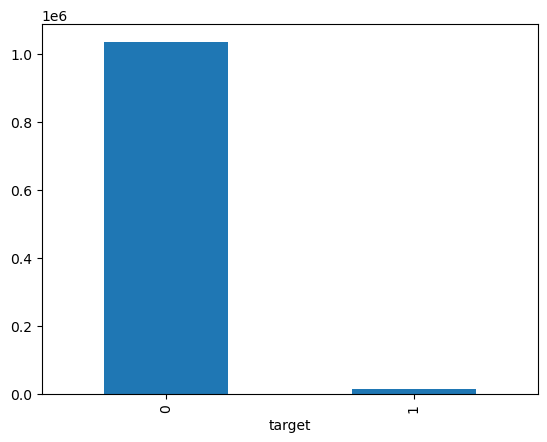

In [61]:
records.target.value_counts().plot(kind="bar");

In [63]:
print("Number of datapoints for credit records: {}".format(len(records)))
print("Number of unique clients in dataset: {}".format(len(records.ID.unique())))

Number of datapoints for credit records: 1048575
Number of unique clients in dataset: 45985


In [65]:
records.head(20)


,ID,MONTHS_BALANCE,STATUS,target
0,5001711,0,X,0
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,0
5,5001712,-1,C,0
6,5001712,-2,C,0
7,5001712,-3,C,0
8,5001712,-4,C,0
9,5001712,-5,C,0


In [67]:
df=pd.DataFrame(records.groupby(['ID'])['target'].agg(max)).reset_index()

In [69]:
df.head()

,ID,target
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [71]:
new_df=pd.merge(data, df, how="inner", on=['ID'])

In [73]:
new_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,1
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,Other,1.0,0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0,0


In [75]:
new_df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'target'],
      dtype='object')